# Imports

In [1]:
from normalisation import BioproxyEvaluator
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm

/home/maxime/.cache/pypoetry/virtualenvs/normalisation-RVbkHmRO-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# get data

In [2]:
df_jump = pd.read_csv('../notebooks/Bioproxy/df_jump.csv')
embedding_col = 'Embeddings_mean'

If Iktos

In [3]:
df_jump[embedding_col] = df_jump[embedding_col].str.replace(
    '/projects/cpjump1/jump/images_embeddings/resnet50_raw/tensors/compounds/single_compoundWell_Embedding_mean/', 
    '/home/maxime/synrepos/phenospace/jump_pl/images_embeddings/ResNet50/tensors/compounds/single_compoundWell_Embedding_mean/')

In [4]:
evaluator = BioproxyEvaluator({
            "ChemBL": Path("/home/maxime/synrepos/phenospace/bioproxy/screens_data_chembl"),
            "Curie": Path("/home/maxime/synrepos/phenospace/bioproxy/screens_data_curie"),
        })
evaluator.add_embeddings(df_jump, embeddings_cols=None)
evaluator

Bioproxy Evaluator with:
  ChemBL: 49 assays
  Curie: 16 assays

In [5]:
evaluator = BioproxyEvaluator({
            "ChemBL": Path("../../bioproxy/screens_data_chembl"),
            "Curie": Path("../../bioproxy/screens_data_curie"),
        })
evaluator.add_embeddings(df_jump, embeddings_cols=None)
evaluator

Bioproxy Evaluator with:
  ChemBL: 49 assays
  Curie: 16 assays

In [6]:
for assays_source, assays_source_dict in evaluator.screens_data.items():
    for key, screen_df in tqdm(assays_source_dict.items(),  desc=f'{assays_source}'):
        screen_df[embedding_col] = screen_df[embedding_col].apply(lambda path: torch.load(path))
    #    screen_df['Embeddings_median'] = screen_df['Embeddings_median'].apply(lambda path: torch.load(path))

        

Curie: 100%|██████████| 16/16 [00:00<00:00, 23.06it/s]


In [7]:
evaluator.embeddings_cols = ['Embeddings_mean']

In [8]:
evaluator.compute_assays_distances(embeddings_cols=[embedding_col], distance='euclidean')

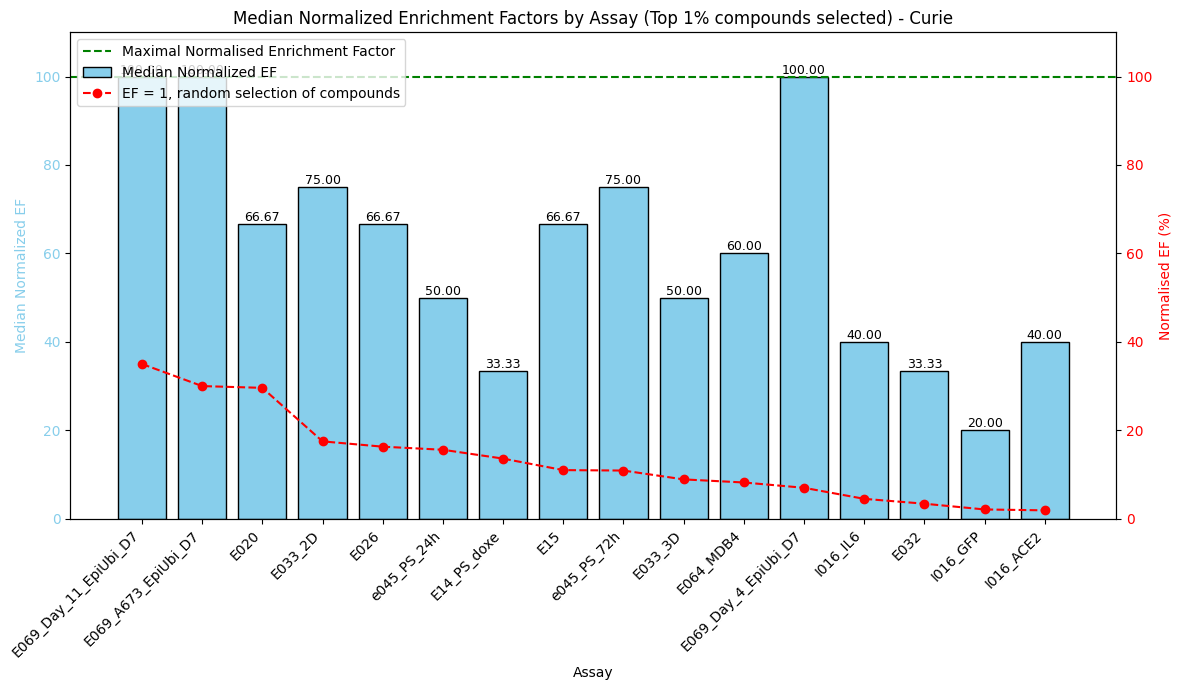

In [9]:

evaluator.plot_aggreg_efs(
    source='Curie',
    embeddings_name='Embeddings_mean',
    percentage=1,          # Optional: defaults to 10
    sort_by='hit_rate'            # Optional: 'EF', 'hit_rate', or None
)

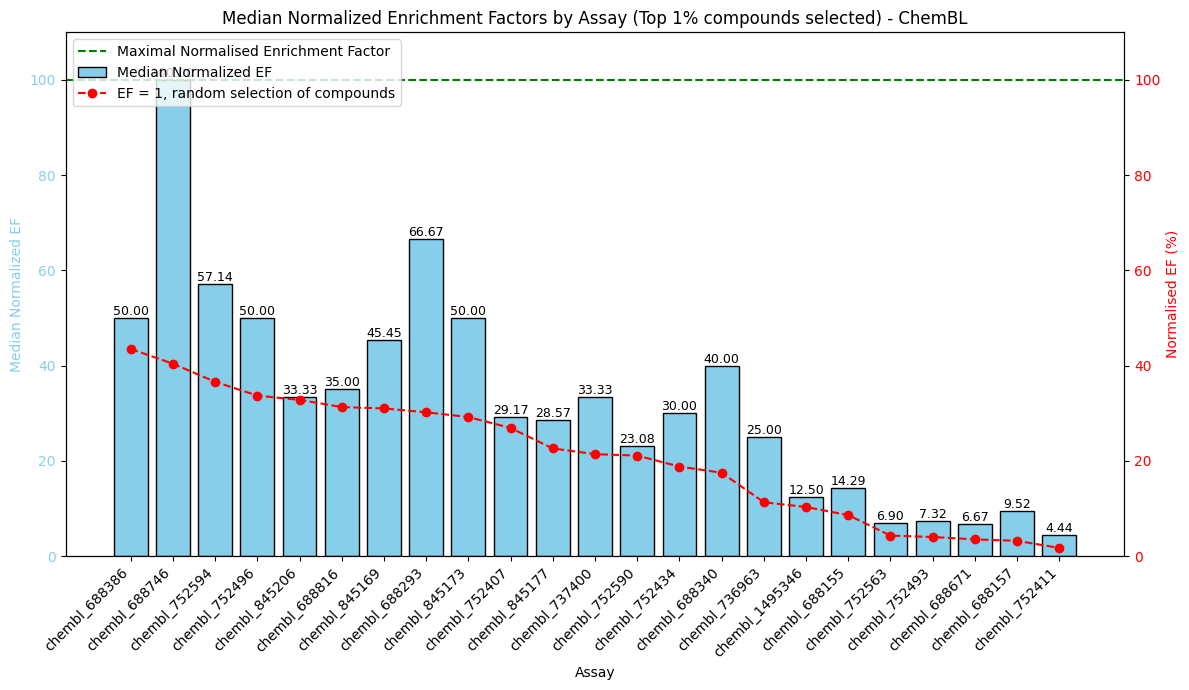

In [10]:

evaluator.plot_aggreg_efs(
    source='ChemBL',
    embeddings_name='Embeddings_mean',
    percentage=1,          # Optional: defaults to 10
    sort_by='hit_rate'            # Optional: 'EF', 'hit_rate', or None
)